In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv',sep = ';')     # loading the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [4]:

df.info()            # 10 Categorical features, 10 Continuos/numerical features, 1 target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()      # though count of null values is zero, the null values are mentioned as unknown

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df1 = df.copy()

## Label Encoding

In [8]:
df1['job'] = df['job'].map({'admin.':0, 'blue-collar':1, 'technician':2, 'services':3, 'management':4, 'retired':5,
                        'entrepreneur':6, 'self-employed':7, 'housemaid':8, 'unemployed':9, 'student':10, 'unknown':11})

In [9]:
df1['job'].replace(11, np.nan, inplace = True)

In [10]:
df1['marital'] = df1['marital'].map({'married':0, 'single':1, 'divorced':2, 'unkown':3})

In [11]:
df1['marital'].replace(3, np.nan,inplace = True)

In [12]:
df1['education'] = df1['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4,
                                         'professional.course':5, 'university.degree':6, 'unknown':7})

In [13]:
df1['education'].replace(7, np.nan, inplace = True)

In [14]:
df1['default'] = df1['default'].map({'no':0, 'yes':1, 'unknown':2})

In [15]:
df1['default'].replace(2, np.nan, inplace = True)

In [16]:
df1['housing'] = df1['housing'].map({'no':0, 'yes':1, 'unknown':2})

In [17]:
df1['housing'].replace(2, np.nan, inplace = True)

In [18]:
df1['loan'] = df1['loan'].map({'no':0, 'yes':1, 'unkown':2})

In [19]:
df1['loan'].replace(2, np.nan, inplace = True)

In [20]:
df1['contact'] = df1['contact'].map({'cellular':0, 'telephone':1})

In [21]:
df1['month'] = df1['month'].map({'mar':0, 'apr':1, 'may':2, 'jun':3, 'jul':4, 'aug':5, 'sep':6, 'oct':7, 'nov':8, 'dec':9})

In [22]:
df1['day_of_week'] = df1['day_of_week'].map({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})

In [23]:
df1['poutcome'] = df1['poutcome'].map({'failure':0, 'success':1, 'nonexistent':2})

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  float64
 2   marital         41108 non-null  float64
 3   education       39457 non-null  float64
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
df1.isnull().sum()  # After encoding and converting the unknown values to Nan, below are the Nan values in the dataframe

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## Imputing

In [26]:
from sklearn.impute import KNNImputer          #Imputation using KNN Imputer

In [27]:
knn = KNNImputer()              #storing the object in a variable

In [28]:
X = df1.drop('y',axis=1)    # independent variables
y = df['y']              #dependent variable

In [29]:
X_le = knn.fit_transform(X)         #imputing the Nan Values
X_le = pd.DataFrame(X_le, columns = X.columns)    #storing in a dataframe

In [30]:
X_le[['job', 'marital', 'education', 'housing', 'loan']] = X_le[['job', 'marital', 'education', 'housing', 'loan']].round()

In [31]:
df_le = X_le.copy()

In [32]:
df_le['y'] = y

In [33]:
df_le

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,999.0,0.0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,3.0,0.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,999.0,0.0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,3.0,0.0,4.0,0.0,1.0,0.0,1.0,2.0,0.0,...,1.0,999.0,0.0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,999.0,0.0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,0.0,...,1.0,999.0,0.0,2.0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,8.0,4.0,...,1.0,999.0,0.0,2.0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,8.0,4.0,...,1.0,999.0,0.0,2.0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,5.0,0.0,6.0,0.0,1.0,0.0,0.0,8.0,4.0,...,2.0,999.0,0.0,2.0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,8.0,4.0,...,1.0,999.0,0.0,2.0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [34]:
df_le.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
df_le['y'] = df_le['y'].map({'no':0,'yes':1})

In [44]:
from sklearn.decomposition import PCA

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

In [95]:
X  = df_le.drop('y',axis = 1)
y = df['y']

In [96]:
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.3, random_state = 42)

In [97]:
ss = StandardScaler()

In [98]:
Xtrain_s = ss.fit_transform(Xtrain)

In [99]:
Xtest_s = ss.transform(Xtest)

In [101]:
Xtrain_s = pd.DataFrame(Xtrain_s,columns = X.columns)
Xtest_s = pd.DataFrame(Xtest_s,columns = X.columns)

In [102]:
Xtrain_s = Xtrain_s.drop('default',axis =1)
Xtest_s = Xtest_s.drop('default',axis =1)

In [103]:
from sklearn.cluster import KMeans

In [104]:
kmeans = KMeans()

In [105]:
ssd = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(Xtrain_s)
    ssd1 = kmeans.inertia_
    ssd.append(ssd1)

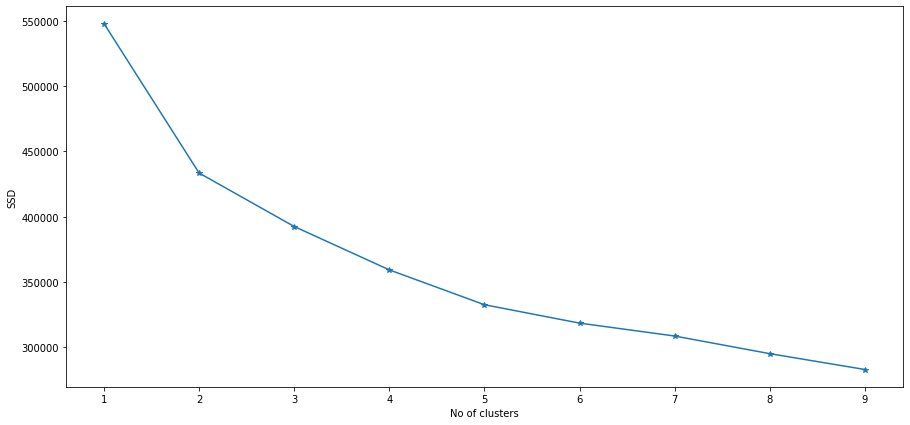

In [106]:
plt.figure(figsize = (15,7))
plt.plot(range(1,10),ssd, marker = '*')
plt.xlabel('No of clusters')
plt.ylabel('SSD')
plt.show()

In [107]:
kmeans = KMeans(n_clusters = 5, random_state = 42)

In [108]:
kmeans.fit(Xtrain_s)

KMeans(n_clusters=5, random_state=42)

In [109]:
Xtrain_s['cluster'] = kmeans.labels_

In [110]:
Xtrain_s['cluster'].value_counts()

1    9613
3    9249
4    6045
0    2885
2    1039
Name: cluster, dtype: int64

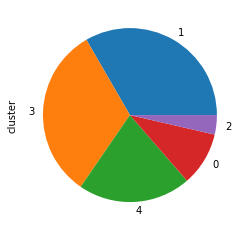

In [111]:
Xtrain_s['cluster'].value_counts().plot(kind = 'pie')
plt.show()

In [65]:
import plusmodules as pm

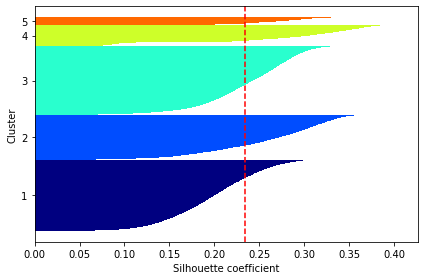

In [66]:
pm.svisualizer(Xtrain_s,5)

In [60]:
df['cluster'] = kmeans.labels_

In [61]:
df.groupby('cluster').min()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
cluster,,,,,,,,,,,,,,,,,,,,,
0,20,admin.,divorced,basic.4y,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-0.1,93.444,-42.7,4.760,5191.0,no
1,18,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-3.4,92.201,-50.8,0.634,4963.6,no
2,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,0,1,failure,-3.4,92.201,-50.8,0.634,4963.6,no
3,18,admin.,divorced,basic.4y,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.053,5176.3,no
4,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,999,1,failure,-3.4,92.201,-50.8,0.634,4963.6,no


In [62]:
df.groupby('cluster').min()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
cluster,,,,,,,,,,,,,,,,,,,,,
0,20,admin.,divorced,basic.4y,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-0.1,93.444,-42.7,4.760,5191.0,no
1,18,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-3.4,92.201,-50.8,0.634,4963.6,no
2,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,0,1,failure,-3.4,92.201,-50.8,0.634,4963.6,no
3,18,admin.,divorced,basic.4y,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.053,5176.3,no
4,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,...,1,999,1,failure,-3.4,92.201,-50.8,0.634,4963.6,no


In [63]:
df.groupby('cluster').max()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
cluster,,,,,,,,,,,,,,,,,,,,,
0,61,unknown,unknown,unknown,unknown,yes,yes,telephone,oct,wed,...,56,999,0,nonexistent,1.4,94.465,-36.1,5.045,5228.1,yes
1,98,unknown,unknown,unknown,unknown,yes,yes,telephone,sep,wed,...,23,999,0,nonexistent,-1.1,94.767,-26.9,1.811,5099.1,yes
2,98,unknown,unknown,unknown,unknown,yes,yes,telephone,sep,wed,...,13,27,7,success,-0.1,94.767,-26.9,4.286,5195.8,yes
3,60,unknown,unknown,unknown,yes,yes,yes,telephone,oct,wed,...,43,999,0,nonexistent,1.4,93.918,-36.1,5.045,5228.1,yes
4,94,unknown,unknown,unknown,yes,yes,yes,telephone,sep,wed,...,16,999,6,failure,-0.1,94.767,-26.9,4.968,5195.8,yes


In [64]:
df['cluster'].value_counts()

3    13672
0    13284
1     8607
4     4110
2     1515
Name: cluster, dtype: int64

In [65]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['y']).agg('sum'))/sum(((df['cluster'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*31)

0
y
no     96.409214
yes     3.590786
Name: cluster, dtype: float64
-------------------------------
3
y
no     93.892627
yes     6.107373
Name: cluster, dtype: float64
-------------------------------
4
y
no     87.055961
yes    12.944039
Name: cluster, dtype: float64
-------------------------------
2
y
no     36.171617
yes    63.828383
Name: cluster, dtype: float64
-------------------------------
1
y
no     78.749855
yes    21.250145
Name: cluster, dtype: float64
-------------------------------


In [66]:
df_0 = df[df['cluster'] == 0]

In [67]:
df_0['month'].value_counts()

may    7763
jun    4374
jul     989
aug     147
oct      11
Name: month, dtype: int64

In [68]:
df_2 = df[df['cluster'] == 2]

In [69]:
df_2['month'].value_counts()

may    248
aug    236
nov    190
sep    161
oct    157
jun    154
jul    118
apr    115
mar     90
dec     46
Name: month, dtype: int64

In [70]:
pd.crosstab(df['cluster'],df['emp.var.rate'])

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
cluster,,,,,,,,,,
0,0,0,0,0,0,0,0,11,7763,5510
1,594,89,1108,6238,326,252,0,0,0,0
2,242,46,232,453,276,231,0,35,0,0
3,0,0,0,0,0,0,9,2939,0,10724
4,235,37,323,2493,171,152,1,698,0,0


In [71]:
pd.crosstab(df['cluster'],df['housing'])

housing,no,unknown,yes
cluster,,,
0,6874,389,6021
1,3510,191,4906
2,646,34,835
3,5872,271,7529
4,1720,105,2285


In [72]:
pd.crosstab(df['cluster'],df['loan'])

loan,no,unknown,yes
cluster,,,
0,10965,389,1930
1,7100,191,1316
2,1251,34,230
3,11251,271,2150
4,3383,105,622


In [73]:
pd.crosstab(df['cluster'],df['y'])

y,no,yes
cluster,,
0,12807,477
1,6778,1829
2,548,967
3,12837,835
4,3578,532


In [74]:
pd.crosstab(df['cluster'],df['contact'])

contact,cellular,telephone
cluster,,
0,0,13284
1,7630,977
2,1402,113
3,13292,380
4,3820,290


In [75]:
(df.groupby(['cluster'])['duration'].mean())/60

cluster
0    4.215142
1    4.474796
2    5.358097
3    4.232620
4    4.089935
Name: duration, dtype: float64

In [76]:
pd.crosstab(df['cluster'],df['day_of_week'])

day_of_week,fri,mon,thu,tue,wed
cluster,,,,,
0,2867,2563,2479,2629,2746
1,1687,2005,1871,1533,1511
2,246,310,343,320,296
3,2149,2796,3092,2832,2803
4,878,840,838,776,778


In [77]:
pd.crosstab(df['cluster'],df['poutcome'])

poutcome,failure,nonexistent,success
cluster,,,
0,0,13284,0
1,0,8607,0
2,142,0,1373
3,0,13672,0
4,4110,0,0


In [78]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['job']).agg('sum'))/sum(((df['cluster'] ==  i).groupby(df['job']).agg('sum'))))*100)
    print('-'*31)

0
job
admin.           21.077989
blue-collar      29.298404
entrepreneur      3.952123
housemaid         2.875640
management        6.662150
retired           2.822945
self-employed     3.500452
services         11.472448
student           0.805480
technician       13.971695
unemployed        2.416441
unknown           1.144234
Name: cluster, dtype: float64
-------------------------------
3
job
admin.           28.240199
blue-collar      18.058806
entrepreneur      3.547396
housemaid         3.101229
management        7.526331
retired           2.998830
self-employed     3.532768
services          8.308953
student           0.607080
technician       21.130778
unemployed        2.252779
unknown           0.694851
Name: cluster, dtype: float64
-------------------------------
4
job
admin.           25.547445
blue-collar      21.313869
entrepreneur      3.722628
housemaid         1.727494
management        7.761557
retired           5.182482
self-employed     3.479319
services         10.7

In [79]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['marital']).agg('sum'))/sum(((df['cluster'] ==  i).groupby(df['marital']).agg('sum'))))*100)
    print('-'*31)

0
marital
divorced    11.321891
married     66.102078
single      22.395363
unknown      0.180668
Name: cluster, dtype: float64
-------------------------------
3
marital
divorced    11.885606
married     61.183441
single      26.784669
unknown      0.146284
Name: cluster, dtype: float64
-------------------------------
4
marital
divorced    11.922141
married     56.204380
single      31.557178
unknown      0.316302
Name: cluster, dtype: float64
-------------------------------
2
marital
divorced     9.306931
married     52.607261
single      37.755776
unknown      0.330033
Name: cluster, dtype: float64
-------------------------------
1
marital
divorced     9.898919
married     54.316254
single      35.575694
unknown      0.209132
Name: cluster, dtype: float64
-------------------------------


In [80]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['education']).agg('sum'))/sum(((df['cluster'] ==  i).groupby(df['education']).agg('sum'))))*100)
    print('-'*31)

0
education
basic.4y               12.767239
basic.6y                7.369768
basic.9y               17.833484
high.school            23.953628
illiterate              0.015056
professional.course    11.472448
university.degree      21.755495
unknown                 4.832882
Name: cluster, dtype: float64
-------------------------------
3
education
basic.4y                8.703920
basic.6y                4.403160
basic.9y               12.200117
high.school            20.991808
illiterate              0.065828
professional.course    14.818607
university.degree      35.247221
unknown                 3.569339
Name: cluster, dtype: float64
-------------------------------
4
education
basic.4y                8.272506
basic.6y                5.231144
basic.9y               15.085158
high.school            26.301703
illiterate              0.024331
professional.course    11.776156
university.degree      29.124088
unknown                 4.184915
Name: cluster, dtype: float64
------------------

In [81]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['job']).agg('sum'))/sum(((df['cluster'] ==  i).groupby(df['job']).agg('sum'))))*100)
    print('-'*31)

0
job
admin.           21.077989
blue-collar      29.298404
entrepreneur      3.952123
housemaid         2.875640
management        6.662150
retired           2.822945
self-employed     3.500452
services         11.472448
student           0.805480
technician       13.971695
unemployed        2.416441
unknown           1.144234
Name: cluster, dtype: float64
-------------------------------
3
job
admin.           28.240199
blue-collar      18.058806
entrepreneur      3.547396
housemaid         3.101229
management        7.526331
retired           2.998830
self-employed     3.532768
services          8.308953
student           0.607080
technician       21.130778
unemployed        2.252779
unknown           0.694851
Name: cluster, dtype: float64
-------------------------------
4
job
admin.           25.547445
blue-collar      21.313869
entrepreneur      3.722628
housemaid         1.727494
management        7.761557
retired           5.182482
self-employed     3.479319
services         10.7

In [82]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cluster'],
      dtype='object')

In [83]:
for i in df['cluster'].unique():
    print(i)
    print((((df['cluster'] == i).groupby(df['pdays']).agg('sum'))/sum(((df['cluster'] ==  i).groupby(df['pdays']).agg('sum'))))*100)
    print('-'*31)

0
pdays
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
25       0.0
26       0.0
27       0.0
999    100.0
Name: cluster, dtype: float64
-------------------------------
3
pdays
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
25       0.0
26       0.0
27       0.0
999    100.0
Name: cluster, dtype: float64
-------------------------------
4
pdays
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11     

In [84]:
df_1 = df[df['cluster'] == 1]

In [85]:
df_3 = df[df['cluster'] == 3]

In [86]:
df_4 = df[df['cluster'] == 4]

In [70]:
data = pd.read_csv('df1_1.csv')

In [71]:
Xtrain_s

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster
0,-1.053709,-0.939372,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,2.632568,-1.407216,-0.695116,0.154139,0.193350,1.673800,-2.821812,-1.962634,-1.490923,1.621455,-1.678565,-1.978346,0
1,-1.053709,-0.171484,0.714397,1.141766,-1.078739,-0.424779,1.322083,-0.791465,1.428361,-0.944916,0.517478,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
2,0.477399,-0.555428,-0.738947,-1.334733,0.927009,-0.424779,1.322083,-0.791465,0.719467,0.073498,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.713705,0.330682,3
3,-0.575238,0.212460,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,-0.791465,0.719467,-0.722018,-0.572537,0.193350,1.673800,-2.821812,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182,0
4,-0.766626,-0.939372,0.714397,-0.096484,-1.078739,-0.424779,-0.756382,-0.791465,1.428361,3.547637,2.334170,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.721425,0.980349,-0.738947,0.522641,-1.078739,-0.424779,1.322083,-0.791465,-0.698321,0.649959,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711976,0.330682,3
28827,-0.288155,0.596404,-0.738947,1.141766,-1.078739,-0.424779,1.322083,-0.302318,0.719467,0.115772,-0.572537,0.193350,-0.349144,0.384070,0.838217,1.531413,-0.277232,0.771912,0.842115,3
28828,-0.479543,-0.939372,-0.738947,-0.096484,0.927009,-0.424779,-0.756382,1.654273,0.719467,-0.245477,-0.572537,-5.182867,1.673800,-1.218871,-2.217257,-1.977395,2.937589,-1.652631,-2.061058,2
28829,-0.001072,0.596404,-0.738947,1.141766,0.927009,-0.424779,1.322083,-0.791465,0.010573,0.142674,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711400,0.330682,3


In [112]:
Xtrain_s

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster
0,-1.053709,-0.939372,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,2.632568,-1.407216,-0.695116,0.154139,0.193350,1.673800,-2.821812,-1.962634,-1.490923,1.621455,-1.678565,-1.978346,0
1,-1.053709,-0.171484,0.714397,1.141766,-1.078739,-0.424779,1.322083,-0.791465,1.428361,-0.944916,0.517478,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
2,0.477399,-0.555428,-0.738947,-1.334733,0.927009,-0.424779,1.322083,-0.791465,0.719467,0.073498,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.713705,0.330682,3
3,-0.575238,0.212460,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,-0.791465,0.719467,-0.722018,-0.572537,0.193350,1.673800,-2.821812,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182,0
4,-0.766626,-0.939372,0.714397,-0.096484,-1.078739,-0.424779,-0.756382,-0.791465,1.428361,3.547637,2.334170,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.721425,0.980349,-0.738947,0.522641,-1.078739,-0.424779,1.322083,-0.791465,-0.698321,0.649959,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711976,0.330682,3
28827,-0.288155,0.596404,-0.738947,1.141766,-1.078739,-0.424779,1.322083,-0.302318,0.719467,0.115772,-0.572537,0.193350,-0.349144,0.384070,0.838217,1.531413,-0.277232,0.771912,0.842115,3
28828,-0.479543,-0.939372,-0.738947,-0.096484,0.927009,-0.424779,-0.756382,1.654273,0.719467,-0.245477,-0.572537,-5.182867,1.673800,-1.218871,-2.217257,-1.977395,2.937589,-1.652631,-2.061058,2
28829,-0.001072,0.596404,-0.738947,1.141766,0.927009,-0.424779,1.322083,-0.791465,0.010573,0.142674,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711400,0.330682,3


In [113]:
X = Xtrain_s.drop('cluster',axis = 1)

In [114]:
y = Xtrain_s['cluster']

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [119]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
Bag = BaggingClassifier()
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [120]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN', KNN))
models.append(('DecisionTree', DT))
models.append(('RandomForest', RF))
models.append(('BaggingClassifier', Bag))
models.append(('AdaBoost', AB))
models.append(('GBoost', GB))

In [87]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
    cv_results = cross_val_score(model, X, y,cv = kfold, scoring = 'f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

Logistic: 0.999757 (0.000000)
NaiveBayes: 0.999653 (0.000000)
KNN: 0.999133 (0.000000)
DecisionTree: 0.999514 (0.000000)
RandomForest: 0.999723 (0.000000)
BaggingClassifier: 0.999584 (0.000000)
AdaBoost: 0.697177 (0.000088)
GBoost: 0.999584 (0.000000)


In [88]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
    cv_results = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

Logistic: 0.999757 (0.000000)
NaiveBayes: 0.999653 (0.000000)
KNN: 0.999133 (0.000000)
DecisionTree: 0.999514 (0.000000)
RandomForest: 0.999757 (0.000000)
BaggingClassifier: 0.999584 (0.000000)
AdaBoost: 0.780687 (0.000055)
GBoost: 0.999584 (0.000000)


In [89]:
from collections import Counter

In [90]:
Counter(y)

Counter({0: 2885, 4: 6045, 3: 9249, 1: 9613, 2: 1039})

In [125]:
LR.fit(X,y)

LogisticRegression()

In [126]:
ypred = LR.predict(Xtest_s)

In [129]:
Xtest_s['cluster'] = ypred

In [130]:
Xtrain_s

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster
0,-1.053709,-0.939372,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,2.632568,-1.407216,-0.695116,0.154139,0.193350,1.673800,-2.821812,-1.962634,-1.490923,1.621455,-1.678565,-1.978346,0
1,-1.053709,-0.171484,0.714397,1.141766,-1.078739,-0.424779,1.322083,-0.791465,1.428361,-0.944916,0.517478,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
2,0.477399,-0.555428,-0.738947,-1.334733,0.927009,-0.424779,1.322083,-0.791465,0.719467,0.073498,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.713705,0.330682,3
3,-0.575238,0.212460,-0.738947,1.141766,-1.078739,-0.424779,-0.756382,-0.791465,0.719467,-0.722018,-0.572537,0.193350,1.673800,-2.821812,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182,0
4,-0.766626,-0.939372,0.714397,-0.096484,-1.078739,-0.424779,-0.756382,-0.791465,1.428361,3.547637,2.334170,0.193350,-0.349144,0.384070,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.721425,0.980349,-0.738947,0.522641,-1.078739,-0.424779,1.322083,-0.791465,-0.698321,0.649959,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711976,0.330682,3
28827,-0.288155,0.596404,-0.738947,1.141766,-1.078739,-0.424779,1.322083,-0.302318,0.719467,0.115772,-0.572537,0.193350,-0.349144,0.384070,0.838217,1.531413,-0.277232,0.771912,0.842115,3
28828,-0.479543,-0.939372,-0.738947,-0.096484,0.927009,-0.424779,-0.756382,1.654273,0.719467,-0.245477,-0.572537,-5.182867,1.673800,-1.218871,-2.217257,-1.977395,2.937589,-1.652631,-2.061058,2
28829,-0.001072,0.596404,-0.738947,1.141766,0.927009,-0.424779,1.322083,-0.791465,0.010573,0.142674,-0.209199,0.193350,-0.349144,0.384070,0.647250,0.718902,0.887871,0.711400,0.330682,3


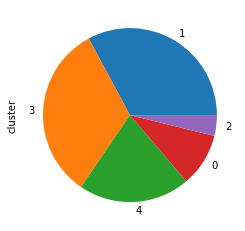

In [134]:
Xtest_s['cluster'].value_counts().plot(kind = 'pie')
plt.show()

In [138]:
(Xtrain_s['cluster'].value_counts()/Xtrain_s['cluster'].value_counts().sum())*100

1    33.342583
3    32.080053
4    20.967015
0    10.006590
2     3.603760
Name: cluster, dtype: float64

In [140]:
(Xtest_s['cluster'].value_counts()/Xtest_s['cluster'].value_counts().sum())*100

1    32.855871
3    32.645464
4    20.733188
0     9.913409
2     3.852068
Name: cluster, dtype: float64